# Importing necessary libraries

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Defining attributes and SofaScore API url to scrap data

In [2]:
# storing features from SofaScore
attack_fields = "goals,expectedGoals,successfulDribbles,bigChancesMissed,successfulDribblesPercentage,totalShots,shotsOnTarget,"\
        "shotsOffTarget,blockedShots,goalConversionPercentage,penaltiesTaken,penaltyGoals,"\
        "penaltyWon,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,headedGoals,"\
        "leftFootGoals,rightFootGoals,hitWoodwork,offsides,penaltyConversion,setPieceConversion,rating"
        
defense_fields = [
    "tackles,interceptions,penaltyConceded,clearances,errorLeadToGoal,errorLeadToShot,\
    ownGoals,dribbledPast,cleanSheet,rating"
]
passing_fields = [
    "bigChancesCreated,assists,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,\
    accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,accurateCrosses,accurateCrossesPercentage,\
    accurateLongBalls,accurateLongBallsPercentage,passToAssist,rating"
]
goalkeeper_fields = [
    "saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,\
    goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,\
    crossesNotClaimed,rating"
]
other_fields = [
    "yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,\
    totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,wasFouled,fouls,dispossessed,\
    possessionLost,appearances,matchesStarted,rating"
]
limit = 100
#fields_formatted = ",".join(fields)
#filters="position.in.G~D~M~F"
#accumulation = total, perGame, per90

In [3]:
# defining url and its atributes
url = (
    "https://api.sofascore.com/api/v1/unique-tournament/16/season/41087/statistics?&"
    f"limit={limit}&"
    "order=-rating&"
    "accumulation=perGame&"
    f"fields={attack_fields}&"
    "filters=position.in.M~F"
)

In [5]:
# defining user-agent browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:107.0) Gecko/20100101 Firefox/107.0"
}

# getting request response from url
response = requests.get(url, headers = headers)

# parsing response text to json variable
parsed = json.loads(response.text)

# Scraping and treating data using pandas

In [6]:
# for result in parsed["results"]:
#   print(result["goals"], result["tackles"], result["player"]["name"])
#print(json.dumps(parsed, indent=3))

# storing results in a dataframe
df = pd.DataFrame(parsed["results"])

In [7]:
# exploding columns with dict values - step 1
df_player_exploded = pd.concat(
    [df.drop(["player"], axis=1), df["player"].apply(pd.Series)], 
    axis=1
    )

In [8]:
# exploding columns with dict values - step 2
df_exploded = pd.concat(
    [df_player_exploded.drop(["team"], axis=1), df_player_exploded["team"].apply(pd.Series)], axis=1
)

In [9]:
# checking resulting features
df_player_exploded.columns

Index(['goals', 'expectedGoals', 'successfulDribbles', 'bigChancesMissed',
       'successfulDribblesPercentage', 'totalShots', 'shotsOnTarget',
       'shotsOffTarget', 'blockedShots', 'goalConversionPercentage',
       'penaltiesTaken', 'penaltyGoals', 'penaltyWon', 'shotFromSetPiece',
       'freeKickGoal', 'goalsFromInsideTheBox', 'goalsFromOutsideTheBox',
       'headedGoals', 'leftFootGoals', 'rightFootGoals', 'hitWoodwork',
       'offsides', 'penaltyConversion', 'setPieceConversion', 'rating', 'team',
       'name', 'slug', 'userCount', 'id'],
      dtype='object')

In [10]:
# droping unnecessary features and sorting dataframe
df_treated = (
    (df_exploded.loc[: , ~df_exploded.columns.duplicated()])\
    .drop(columns=["userCount", "sport", "userCount", "teamColors", "id", "type"])\
    .sort_values("goals", ascending=False, ignore_index=True)
)

# Selecting players only from quarter finals teams

In [11]:
quarters_teams = ["France", "England", "Argentina", "Brazil", "Portugal", "Croatia", "Netherlands", "Morocco"]

In [12]:
df_treated = df_treated[df_treated["shortName"].isin(quarters_teams)]

In [13]:
df_treated

,goals,expectedGoals,successfulDribbles,bigChancesMissed,successfulDribblesPercentage,totalShots,shotsOnTarget,shotsOffTarget,blockedShots,goalConversionPercentage,...,leftFootGoals,rightFootGoals,hitWoodwork,offsides,penaltyConversion,setPieceConversion,rating,name,slug,shortName
0,1.25,0.67,3.25,1.00,48.15,5.25,2.50,1.25,1.50,23.81,...,0.00,1.00,0.00,0.25,0.00,0.0,7.85,Kylian Mbappé,kylian-mbappe,France
1,1.00,0.69,0.00,0.33,0.00,2.33,1.33,0.00,1.00,42.86,...,0.33,0.67,0.00,0.33,0.00,0.0,7.43,Richarlison,richarlison,Brazil
5,1.00,0.43,0.00,0.33,0.00,2.00,1.67,0.33,0.00,50.00,...,0.67,0.33,0.00,0.67,0.00,0.0,7.60,Gonçalo Ramos,goncalo-ramos,Portugal
6,1.00,0.19,0.33,0.00,20.00,2.00,1.33,0.67,0.00,50.00,...,1.00,0.00,0.00,0.67,0.00,0.0,7.60,Bukayo Saka,bukayo-saka,England
8,1.00,0.79,0.00,0.33,0.00,3.00,1.00,2.00,0.00,33.33,...,0.33,0.33,0.00,0.33,0.00,0.0,7.50,Olivier Giroud,olivier-giroud,France
9,0.75,0.70,2.25,0.50,56.25,4.75,2.50,1.75,0.50,15.79,...,0.75,0.00,0.00,0.50,12.50,0.0,7.95,Lionel Messi,lionel-messi,Argentina
10,0.75,0.38,1.25,0.25,55.56,2.50,1.50,0.50,0.50,30.00,...,0.50,0.25,0.00,0.25,0.00,25.0,7.23,Marcus Rashford,marcus-rashford,England
12,0.75,0.08,1.25,0.00,100.00,1.25,0.75,0.00,0.50,60.00,...,0.25,0.25,0.00,0.75,0.00,0.0,7.63,Cody Gakpo,cody-gakpo,Netherlands
16,0.67,0.34,0.00,0.00,0.00,2.00,1.00,0.67,0.33,33.33,...,0.00,0.67,0.33,0.33,33.33,0.0,8.43,Bruno Fernandes,bruno-fernandes,Portugal
20,0.50,0.38,0.00,0.00,0.00,1.50,1.00,0.00,0.50,33.33,...,0.00,0.50,0.00,0.00,0.00,0.0,7.15,Ricardo Horta,ricardo-horta,Portugal


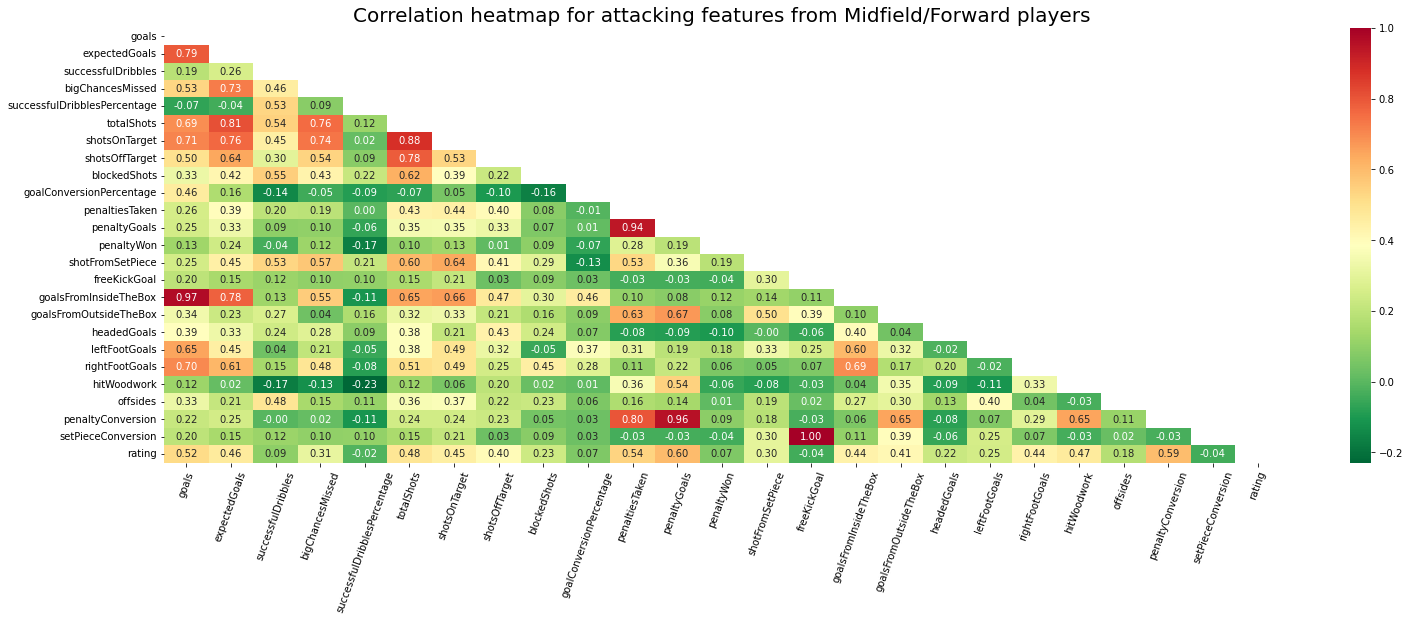

In [14]:
# ploting correlation heatmap 
plt.figure(figsize = (25, 8))
sns.heatmap(df_treated.corr(), annot=True, fmt=".2f", mask=np.triu(df_treated.corr()), cmap="RdYlGn_r")
plt.xticks(rotation=70)
plt.title("Correlation heatmap for attacking features from Midfield/Forward players", fontdict={"fontsize": 20});

In [15]:
# calculating top 5 highest correlated features for each one of them
corr_features = {}
for feature in df_treated.corr():
    features = df_treated.corr()[feature].sort_values(ascending=False).head(6).index.to_list()
    print(f"{feature.capitalize()} owns more correlation with the following features: " + " ".join(str(p) for p in features[1:])+"\n")
    corr_features[feature] = features[1:]

Goals owns more correlation with the following features: goalsFromInsideTheBox expectedGoals shotsOnTarget rightFootGoals totalShots

Expectedgoals owns more correlation with the following features: totalShots goals goalsFromInsideTheBox shotsOnTarget bigChancesMissed

Successfuldribbles owns more correlation with the following features: blockedShots totalShots shotFromSetPiece successfulDribblesPercentage offsides

Bigchancesmissed owns more correlation with the following features: totalShots shotsOnTarget expectedGoals shotFromSetPiece goalsFromInsideTheBox

Successfuldribblespercentage owns more correlation with the following features: successfulDribbles blockedShots shotFromSetPiece goalsFromOutsideTheBox totalShots

Totalshots owns more correlation with the following features: shotsOnTarget expectedGoals shotsOffTarget bigChancesMissed goals

Shotsontarget owns more correlation with the following features: totalShots expectedGoals bigChancesMissed goals goalsFromInsideTheBox

Shot

In [16]:
# checking top 5 correlated features for each one of them
corr_features

{'goals': ['goalsFromInsideTheBox',
  'expectedGoals',
  'shotsOnTarget',
  'rightFootGoals',
  'totalShots'],
 'expectedGoals': ['totalShots',
  'goals',
  'goalsFromInsideTheBox',
  'shotsOnTarget',
  'bigChancesMissed'],
 'successfulDribbles': ['blockedShots',
  'totalShots',
  'shotFromSetPiece',
  'successfulDribblesPercentage',
  'offsides'],
 'bigChancesMissed': ['totalShots',
  'shotsOnTarget',
  'expectedGoals',
  'shotFromSetPiece',
  'goalsFromInsideTheBox'],
 'successfulDribblesPercentage': ['successfulDribbles',
  'blockedShots',
  'shotFromSetPiece',
  'goalsFromOutsideTheBox',
  'totalShots'],
 'totalShots': ['shotsOnTarget',
  'expectedGoals',
  'shotsOffTarget',
  'bigChancesMissed',
  'goals'],
 'shotsOnTarget': ['totalShots',
  'expectedGoals',
  'bigChancesMissed',
  'goals',
  'goalsFromInsideTheBox'],
 'shotsOffTarget': ['totalShots',
  'expectedGoals',
  'bigChancesMissed',
  'shotsOnTarget',
  'goals'],
 'blockedShots': ['totalShots',
  'successfulDribbles',
  '

In [17]:
corr_features.keys()

dict_keys(['goals', 'expectedGoals', 'successfulDribbles', 'bigChancesMissed', 'successfulDribblesPercentage', 'totalShots', 'shotsOnTarget', 'shotsOffTarget', 'blockedShots', 'goalConversionPercentage', 'penaltiesTaken', 'penaltyGoals', 'penaltyWon', 'shotFromSetPiece', 'freeKickGoal', 'goalsFromInsideTheBox', 'goalsFromOutsideTheBox', 'headedGoals', 'leftFootGoals', 'rightFootGoals', 'hitWoodwork', 'offsides', 'penaltyConversion', 'setPieceConversion', 'rating'])

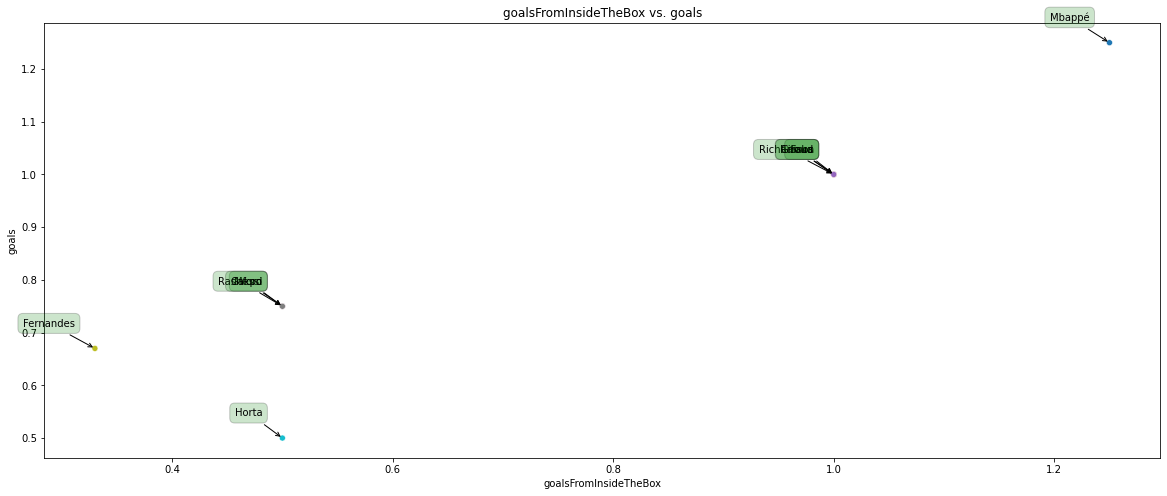

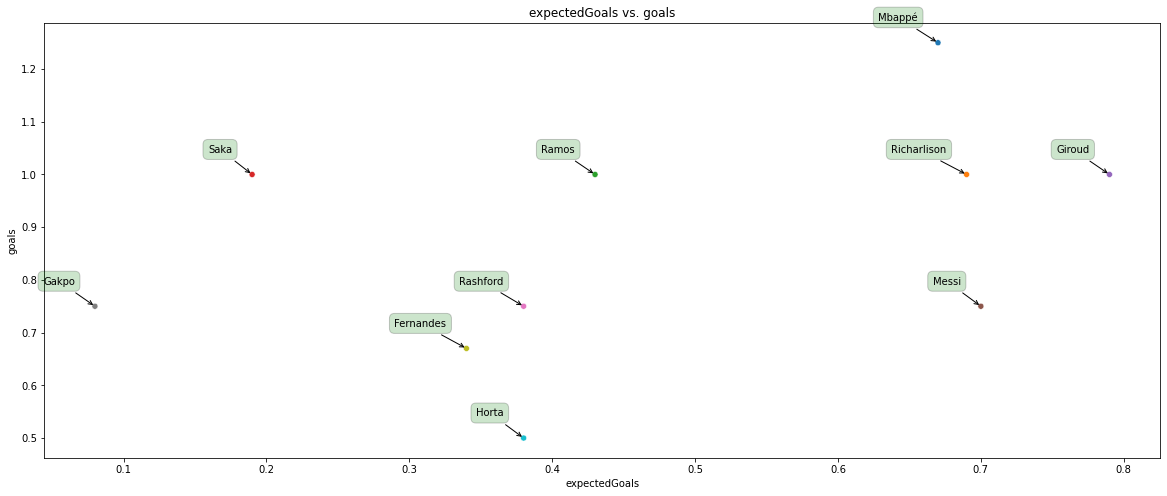

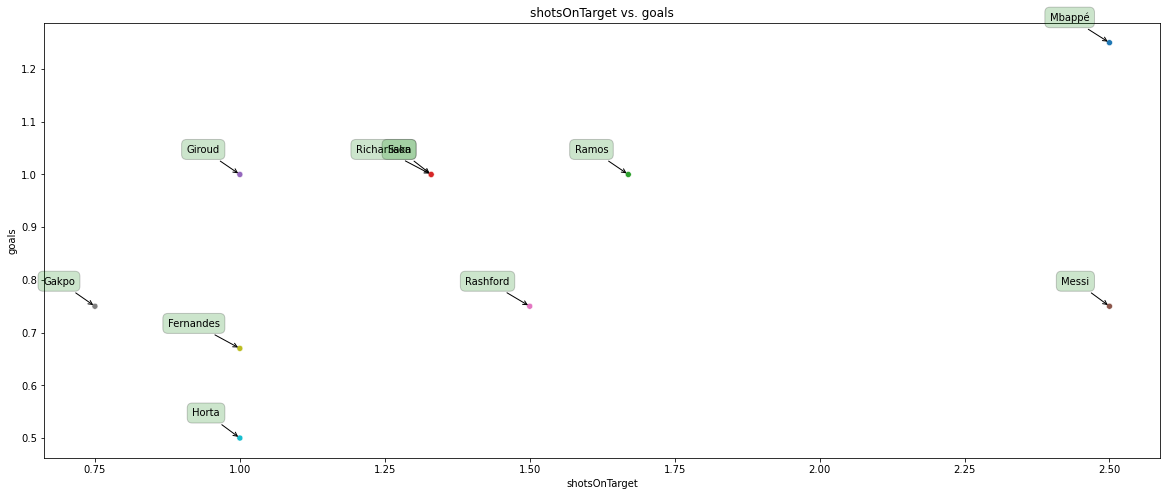

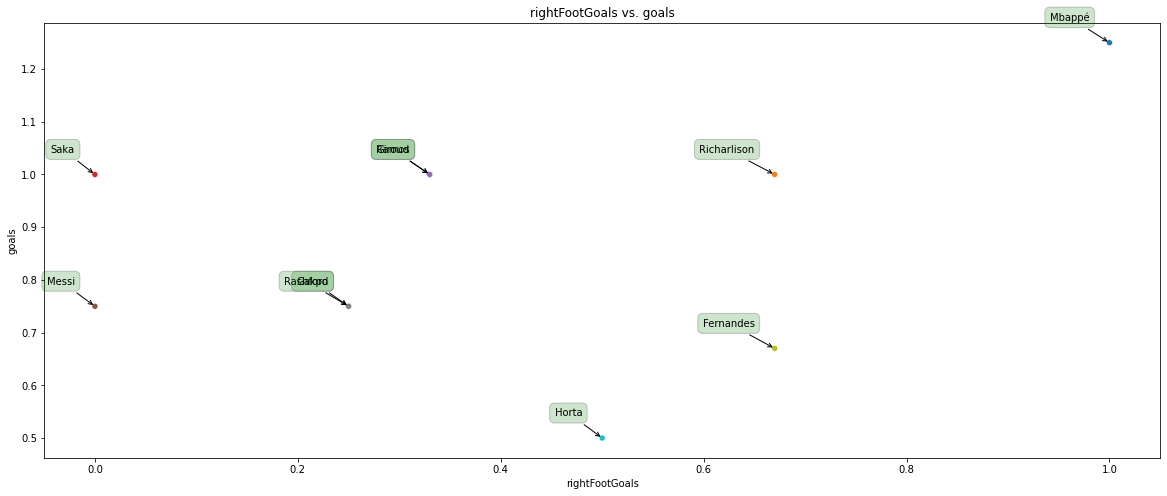

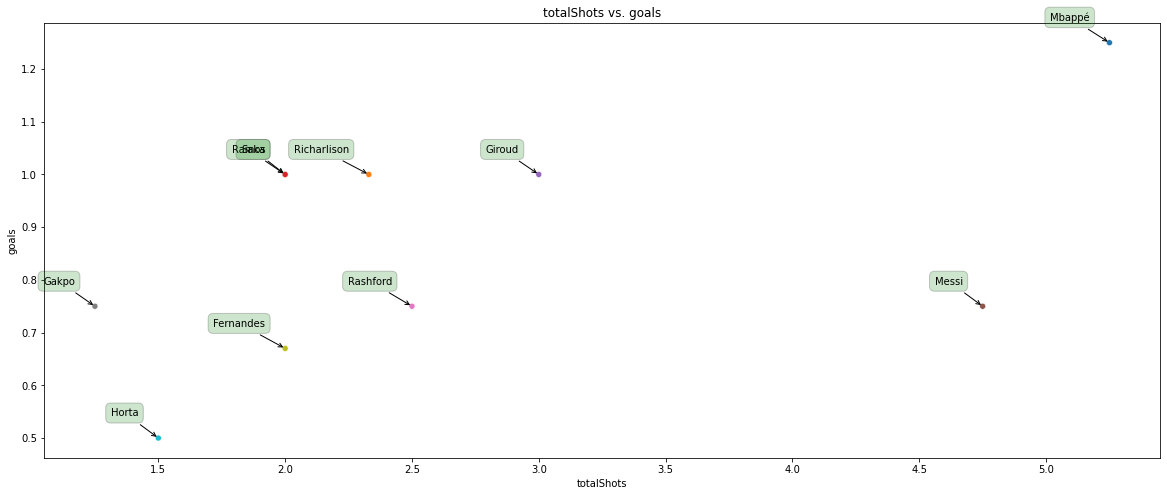

In [18]:
#params_plot = ['goals', 'expectedGoals', 'successfulDribbles', 'bigChancesMissed', 'successfulDribblesPercentage', 'totalShots', 'name']

# exploring goals vs. features
for feature in corr_features["goals"]:
    #print(feature)

    plt.figure(figsize=(20, 8))
    sns.scatterplot(
        data = df_treated.loc[
            df_treated["goals"] >= 0.5, 
            ["goals", feature, "name"]
          ], 
        x = feature,
        y = "goals",
        hue="name",
        legend=False
        )
    for label, x, y in zip(
        [name[-1] for name in df_treated["name"].str.split(" ")], 
        df_treated[feature], 
        df_treated["goals"]
      ):
      plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.2),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
      )
    plt.title(f"{feature} vs. goals")
    plt.show();

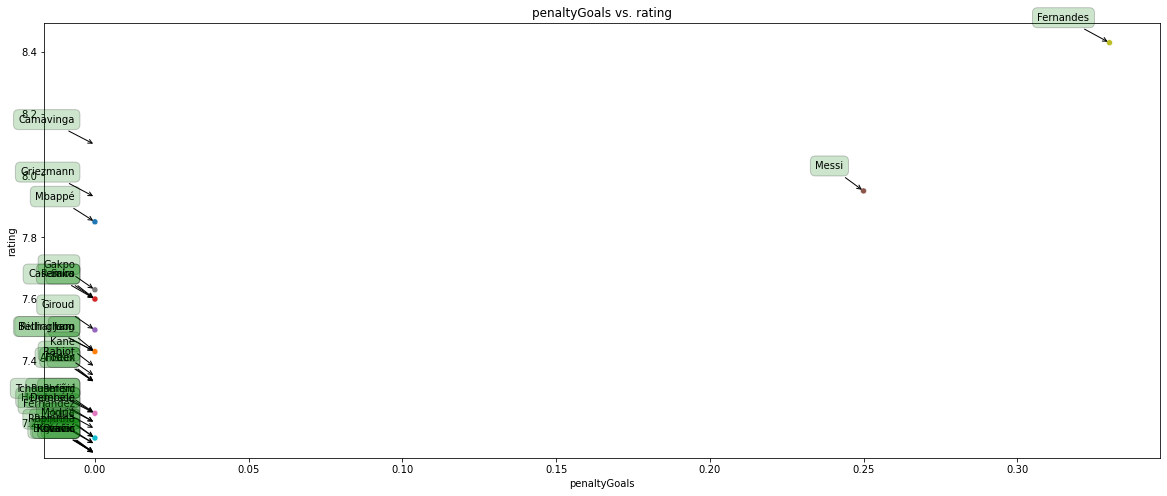

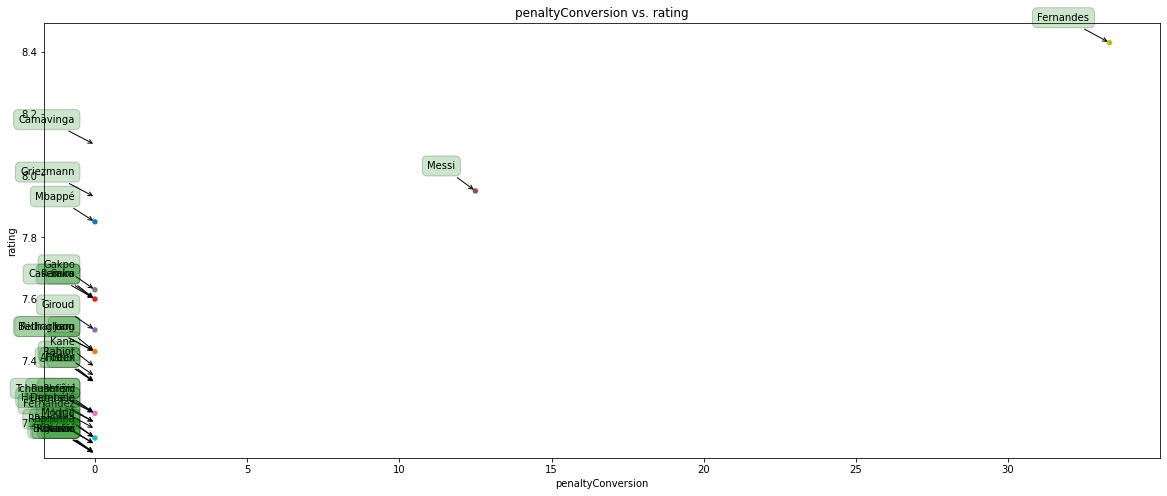

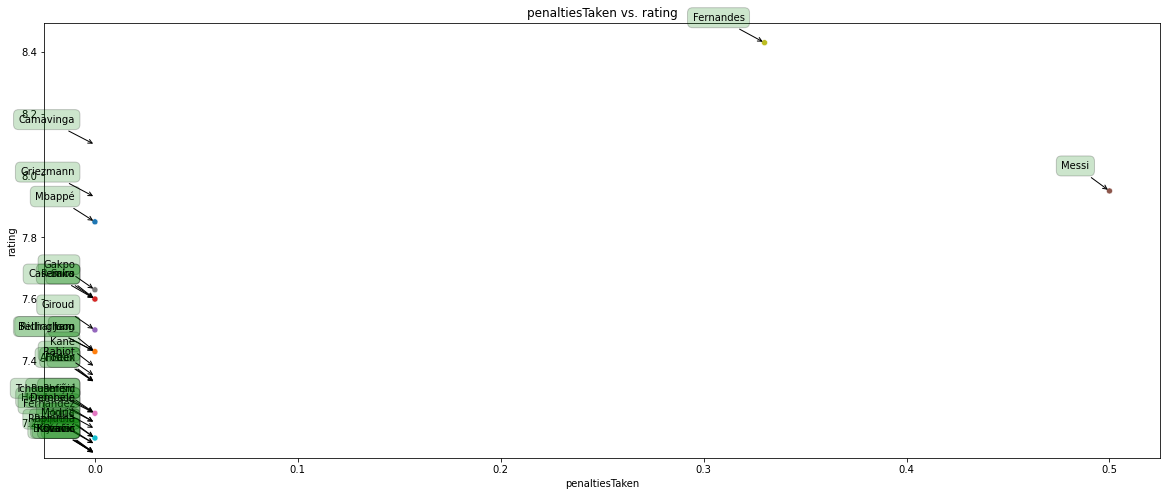

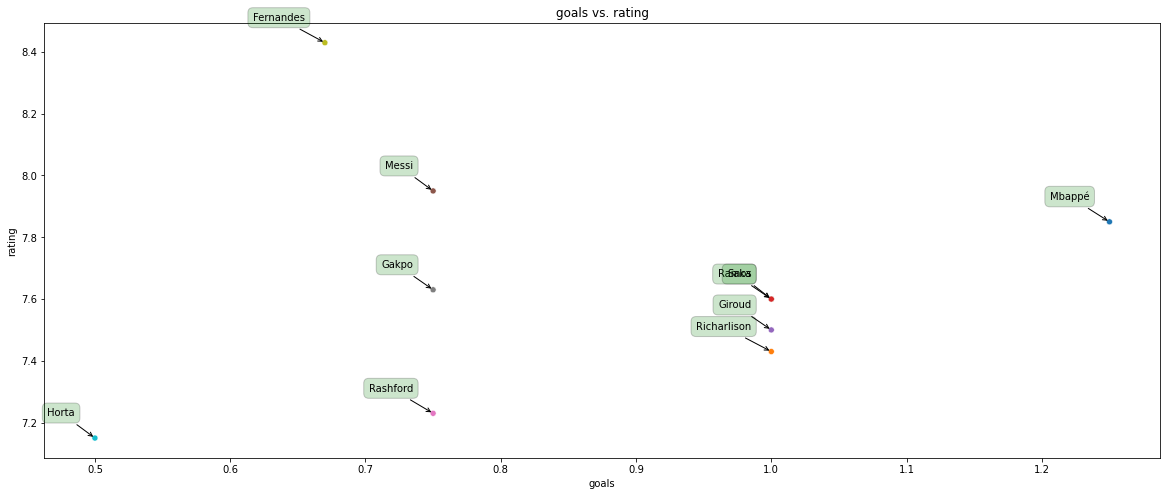

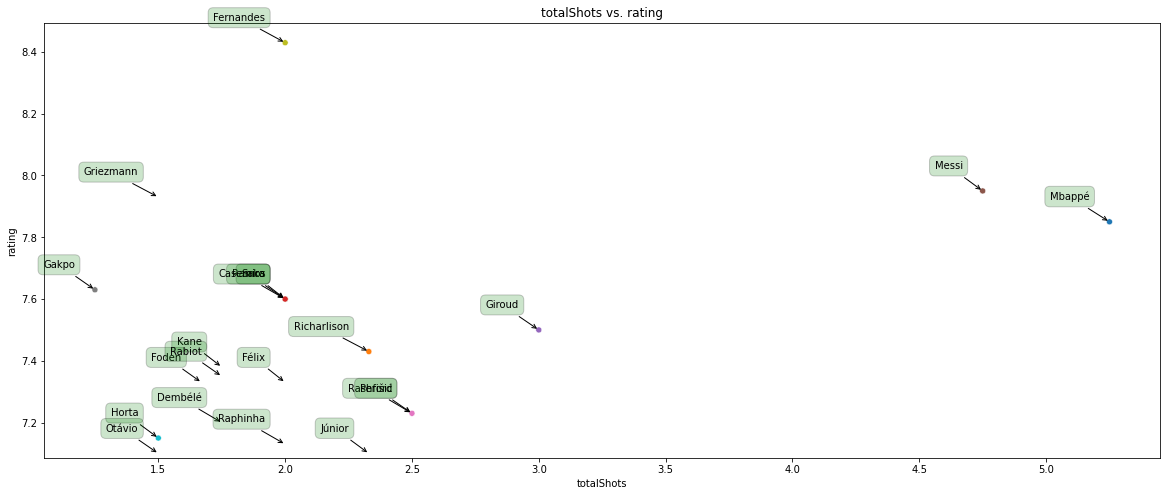

In [19]:
# exploring rating vs. features
for feature in corr_features["rating"]:
    #print(feature)

    plt.figure(figsize=(20, 8))
    sns.scatterplot(
        data = df_treated.loc[
            df_treated["goals"] >= 0.5, 
            ["rating", feature, "name"]
          ], 
        x = feature,
        y = "rating",
        hue="name",
        legend=False
        )
    for label, x, y in zip(
        [name[-1] for name in df_treated["name"].str.split(" ")], 
        df_treated[feature], 
        df_treated["rating"]
      ):
      plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.2),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
      )
    plt.title(f"{feature} vs. rating")
    plt.show();